In [1]:
#"Elvis, Jamil, Jacob certify that the code and data in this assignment were generated independently, using only the tools
#and resources defined in the course and that we did not receive any external help, coaching, or contributions
#during the production of this work."

import argparse
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pydot
import matplotlib.pyplot as plt
from fileData import *
from netEnv import *
import time
import pickle
import math
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import cmocean
from math import sqrt
import random
code_path = ".."
#code_path = sys.path[0]


In [2]:
requiredFields=['FileCount','AvgFileSize','BufSize','Bandwidth','AvgRtt','CC_Level','P_Level','PP_Level','numActiveCores','frequency','TotalAvgTput','TotalEnergy','DataTransferEnergy']
LabelName='TotalAvgTput'
fileData_chameleon=ReadFile(code_path+'/Dataset/Chameleon_Combined_all.csv',requiredFields)
optimal_throughput_dictionary_chameleon=fileData_chameleon.return_map_for_tuple_to_throughput()
filedata_grouped_df=fileData_chameleon.get_grouped_df()
print("There are total %d number of groups based on FileCount, AvgFileSize,BufSize, Bandwidth, AvgRtt"%filedata_grouped_df.ngroups)
# total_test_log=0
# for key in filedata_grouped_df.groups.keys():
#     print(f"group key is {key}")
#     key_specific_test_logs=fileData_chameleon.return_group_specific_test_logs(key)
#     total_test_log+=len(key_specific_test_logs)
#     print(f"key_specific_test_logs {len(key_specific_test_logs)}")
# print(f"Total Test logs {total_test_log}")
# print(f"Total logs {len(fileData_chameleon.logs)}")

There are total 38 number of groups based on FileCount, AvgFileSize,BufSize, Bandwidth, AvgRtt


In [3]:
key=(32, 34.9238114, 40, 10, 30)
key_specific_test_logs=fileData_chameleon.return_group_specific_test_logs(key)
# for log in key_specific_test_logs:
#     print()
#     print(log)

In [4]:
print(type(fileData_chameleon.get_grouped_df()))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [5]:
selectedgroup=environmentGroup(fileData_chameleon.get_grouped_df(),key)
print(type(selectedgroup.return_a_group()))
a_group=selectedgroup.return_a_group()
print(a_group)
print(selectedgroup.return_state_list())

<class 'pandas.core.frame.DataFrame'>
       Bandwidth  FileCount  AvgFileSize  BufSize  CC_Level  P_Level  \
22725         10         32    34.923811       40         1        1   
22726         10         32    34.923811       40         1        1   
22727         10         32    34.923811       40         1        1   
22728         10         32    34.923811       40         1        1   
22729         10         32    34.923811       40         1        1   
...          ...        ...          ...      ...       ...      ...   
23584         10         32    34.923811       40        32        1   
23585         10         32    34.923811       40        32        1   
23586         10         32    34.923811       40        32        1   
23587         10         32    34.923811       40        32        1   
23588         10         32    34.923811       40        32        1   

       PP_Level  numActiveCores  frequency  AvgRtt  TotalAvgTput  TotalEnergy  \
22725         1 

In [6]:
print(selectedgroup.return_action_list())



[(1, 1, 1), (1, 1, 2), (1, 1, 4), (1, 1, 8), (1, 1, 16), (1, 1, 32), (2, 1, 1), (2, 1, 2), (2, 1, 4), (2, 1, 8), (2, 1, 16), (2, 1, 32), (4, 1, 1), (4, 1, 2), (4, 1, 4), (4, 1, 8), (4, 1, 16), (4, 1, 32), (8, 1, 1), (8, 1, 2), (8, 1, 4), (8, 1, 8), (8, 1, 16), (8, 1, 32), (16, 1, 1), (16, 1, 2), (16, 1, 4), (16, 1, 8), (16, 1, 16), (16, 1, 32), (32, 1, 1), (32, 1, 2), (32, 1, 4), (32, 1, 8), (32, 1, 16), (32, 1, 32)]
(16.0, 1.0, 8.0)


In [8]:
# for key in filedata_grouped_df.groups.keys():
#     envGrp = environmentGroup(filedata_grouped_df, key)
#     print(len(envGrp.return_action_list()))
print(selectedgroup.group_maximum_throughput())
print(selectedgroup.return_group_max_throughput_parameters())
env = NetEnvironment(selectedgroup)

8191.376288
(16.0, 1.0, 8.0)


In [8]:
# for index, row in a_group.iterrows():
#     print(index ,row)

In [9]:
group_from_grouped_df=selectedgroup.return_group_from_grouped_df()
total_key=0
for key in filedata_grouped_df.groups.keys():
    print(f"group key is {key}")
    total_key+=1
print(f"total number of keys are {total_key}")


group key is (32, 34.9238114, 40, 10, 30)
group key is (32, 34.9238114, 40, 10, 40)
group key is (32, 34.9238114, 40, 10, 50)
group key is (32, 222.6392977, 40, 10, 30)
group key is (32, 222.6392977, 40, 10, 40)
group key is (32, 222.6392977, 40, 10, 50)
group key is (32, 222.6392977, 40, 10, 60)
group key is (32, 222.64, 40, 10, 30)
group key is (32, 222.64, 40, 10, 40)
group key is (32, 222.64, 40, 10, 50)
group key is (32, 222.64, 40, 10, 60)
group key is (32, 222.64, 40, 10, 70)
group key is (32, 222.64, 40, 10, 80)
group key is (32, 222.64, 40, 10, 90)
group key is (64, 222.6343047, 40, 10, 30)
group key is (64, 222.6343047, 40, 10, 40)
group key is (64, 222.6343047, 40, 10, 60)
group key is (128, 222.7841896, 40, 10, 30)
group key is (128, 222.7841896, 40, 10, 40)
group key is (250, 2.410113346, 40, 10, 30)
group key is (250, 2.410113346, 40, 10, 40)
group key is (250, 2.410113346, 40, 10, 50)
group key is (250, 2.410113346, 40, 10, 60)
group key is (250, 2.410113346, 40, 10, 70)

In [10]:
df=a_group
df

,Bandwidth,FileCount,AvgFileSize,BufSize,CC_Level,P_Level,PP_Level,numActiveCores,frequency,AvgRtt,TotalAvgTput,TotalEnergy,DataTransferEnergy
22725,10,32,34.923811,40,1,1,1,2,1.2,30,512.224291,11836.076,1384.112876
22726,10,32,34.923811,40,1,1,1,2,1.6,30,504.254821,11889.275,1272.122933
22727,10,32,34.923811,40,1,1,1,2,2.0,30,547.873945,11093.137,1321.189750
22728,10,32,34.923811,40,1,1,1,2,2.3,30,503.303589,11990.924,1353.616015
22729,10,32,34.923811,40,1,1,1,4,1.2,30,481.931146,12681.068,1572.021958
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23584,10,32,34.923811,40,32,1,32,32,2.3,30,3942.234921,1827.800,469.739053
23585,10,32,34.923811,40,32,1,32,48,1.2,30,2371.974972,2844.968,587.953122
23586,10,32,34.923811,40,32,1,32,48,1.6,30,6827.082637,1204.863,420.842591
23587,10,32,34.923811,40,32,1,32,48,2.0,30,5757.637900,1396.967,467.376074


In [11]:
df_group=df.groupby(['CC_Level','P_Level','PP_Level','numActiveCores','frequency'])
df_group

In [13]:
# total_key=0
# for key in df_group.groups.keys():
#     print(f"group key is {key}")
#     total_key+=1
# print(f"total number of keys are {total_key}")

In [14]:
print(selectedgroup.return_action_list())
print(len(selectedgroup.return_action_list()))

[(1, 1, 1), (1, 1, 2), (1, 1, 4), (1, 1, 8), (1, 1, 16), (1, 1, 32), (2, 1, 1), (2, 1, 2), (2, 1, 4), (2, 1, 8), (2, 1, 16), (2, 1, 32), (4, 1, 1), (4, 1, 2), (4, 1, 4), (4, 1, 8), (4, 1, 16), (4, 1, 32), (8, 1, 1), (8, 1, 2), (8, 1, 4), (8, 1, 8), (8, 1, 16), (8, 1, 32), (16, 1, 1), (16, 1, 2), (16, 1, 4), (16, 1, 8), (16, 1, 16), (16, 1, 32), (32, 1, 1), (32, 1, 2), (32, 1, 4), (32, 1, 8), (32, 1, 16), (32, 1, 32)]
36


In [15]:
print(selectedgroup.return_state_list())
print(len(selectedgroup.return_state_list()))

[[32, 34.9238114, 40, 10, 30, 1, 1, 1], [32, 34.9238114, 40, 10, 30, 1, 1, 2], [32, 34.9238114, 40, 10, 30, 1, 1, 4], [32, 34.9238114, 40, 10, 30, 1, 1, 8], [32, 34.9238114, 40, 10, 30, 1, 1, 16], [32, 34.9238114, 40, 10, 30, 1, 1, 32], [32, 34.9238114, 40, 10, 30, 2, 1, 1], [32, 34.9238114, 40, 10, 30, 2, 1, 2], [32, 34.9238114, 40, 10, 30, 2, 1, 4], [32, 34.9238114, 40, 10, 30, 2, 1, 8], [32, 34.9238114, 40, 10, 30, 2, 1, 16], [32, 34.9238114, 40, 10, 30, 2, 1, 32], [32, 34.9238114, 40, 10, 30, 4, 1, 1], [32, 34.9238114, 40, 10, 30, 4, 1, 2], [32, 34.9238114, 40, 10, 30, 4, 1, 4], [32, 34.9238114, 40, 10, 30, 4, 1, 8], [32, 34.9238114, 40, 10, 30, 4, 1, 16], [32, 34.9238114, 40, 10, 30, 4, 1, 32], [32, 34.9238114, 40, 10, 30, 8, 1, 1], [32, 34.9238114, 40, 10, 30, 8, 1, 2], [32, 34.9238114, 40, 10, 30, 8, 1, 4], [32, 34.9238114, 40, 10, 30, 8, 1, 8], [32, 34.9238114, 40, 10, 30, 8, 1, 16], [32, 34.9238114, 40, 10, 30, 8, 1, 32], [32, 34.9238114, 40, 10, 30, 16, 1, 1], [32, 34.9238114

In [16]:
print(selectedgroup.return_group_key_throughput((4, 1, 2)))

[2809.792261, 2513.533305, 3160.124863, 3075.401708, 3124.276303, 2747.151524, 3189.810066, 3179.289361, 3329.486429, 2967.294643, 2978.533835, 2462.475542, 2709.415242, 2977.940176, 3193.559976, 2880.622808, 2881.456121, 2904.421509, 2909.936771, 3112.72299, 3193.730636, 2855.299861, 3122.317611, 3118.570309]


# Following code is to check different properties of actual gym environment

In [17]:
gym_env=NetEnvironment(selectedgroup)
obs_=gym_env.reset()
print(obs_)
print(f"gym_env.observation_space.shape{gym_env.observation_space.shape}")
print(f"gym_env.action_space.shape{gym_env.action_space}")
for i in range(0,100):    
    current_observation, reward, done, info=gym_env.step(3)
    print(f"current_observation={current_observation} reward={reward} done={done} info={info}")


[32.        34.9238114 40.        10.        30.         1.
  1.         1.       ]
gym_env.observation_space.shape(8,)
gym_env.action_space.shapeDiscrete(36)
current_observation=[32.        34.9238114 40.        10.        30.         1.
  1.         8.       ] reward=0.252929349007584 done=False info={'time': 1, 'max_time': 100}
current_observation=[32.        34.9238114 40.        10.        30.         1.
  1.         8.       ] reward=-0.3 done=False info={'time': 2, 'max_time': 100}
current_observation=[32.        34.9238114 40.        10.        30.         1.
  1.         8.       ] reward=-0.3 done=False info={'time': 3, 'max_time': 100}
current_observation=[32.        34.9238114 40.        10.        30.         1.
  1.         8.       ] reward=0.2792620378520694 done=False info={'time': 4, 'max_time': 100}
current_observation=[32.        34.9238114 40.        10.        30.         1.
  1.         8.       ] reward=0.2792620378520694 done=False info={'time': 5, 'max_time': 

In [18]:
action=gym_env.action_space.sample()
print(action)

29


# DQN implementation

In [19]:
print(f"current_observation={type(current_observation)} reward={type(reward)} done={type(done)} info={type(info)}")

current_observation=<class 'numpy.ndarray'> reward=<class 'numpy.float64'> done=<class 'bool'> info=<class 'dict'>


In [21]:
import torch
from torch import nn
import gym
from collections import deque
import itertools
import numpy as np
import random

GAMMA=0.99
BATCH_SIZE=32
BUFFER_SIZE=50000
MIN_REPLAY_SIZE=10000
EPSILON_START=1.0
EPSILON_END=0.02
EPSILON_DECAY=100000
TARGET_UPDATE_FREQ=1000

class Network(nn.Module):
    def __init__(self,env):
        super().__init__()
        in_features=int(np.prod(env.obs_shape))
        self.net=nn.Sequential(
                nn.Linear(in_features,64),
            nn.Tanh(),
            nn.Linear(64, env.action_space.n))
    
    def forward(self,x):
         return self.net(x)
        
    def act(self,obs):
        obs_t=torch.as_tensor(obs,dtype=torch.float32)
        q_values=self(obs_t.unsqueeze(0))
        max_q_index=torch.argmax(q_values,dim=1)[0]
        action=max_q_index.detach().item()
        
        return action

In [23]:
env=NetEnvironment(selectedgroup)
TRAINING_STEPS=170000
replay_buffer=deque(maxlen=BUFFER_SIZE)
rew_buffer=deque([0.0],maxlen=100)
episode_reward=0.0
online_net=Network(env)
target_net=Network(env)
target_net.load_state_dict(online_net.state_dict())
optimizer=torch.optim.Adam(online_net.parameters(),lr=5e-4)
reward_per_episode=[]
epsilon_per_episode=[]
#### replay buffer initialize

obs=env.reset()
for _ in range(MIN_REPLAY_SIZE):
    action=env.action_space.sample()
    new_obs,rew,done, _ =env.step(action)
    transition=(obs,action,rew,done,new_obs)
    replay_buffer.append(transition)
    obs=new_obs
    if done:
        obs=env.reset()     

###Main training

obs=env.reset()

# for step in itertools.count():
for step in range(TRAINING_STEPS):
    epsilon=np.interp(step,[0,EPSILON_DECAY],[EPSILON_START,EPSILON_END])
    rnd_sample=random.random()
    if rnd_sample <=epsilon:
        action=env.action_space.sample()
    else:
        action=online_net.act(obs)
    
    new_obs,rew,done, _ =env.step(action)
    transition= (obs,action,rew,done,new_obs)
#     print('transitions',transition)
    replay_buffer.append(transition)
    obs=new_obs
    episode_reward+=rew
    if done:
        obs=env.reset()
        rew_buffer.append(episode_reward)
        reward_per_episode.append(episode_reward)
        epsilon_per_episode.append(epsilon)
        episode_reward=0.0
    
    #### Satrt gradient Step
    transitions=random.sample(replay_buffer, BATCH_SIZE)
#     print(transitions)
    obses=np.asarray([t[0] for t in transitions])
    actions=np.asarray([t[1] for t in transitions])
    rews=np.asarray([t[2] for t in transitions])
    dones=np.asarray([t[3] for t in transitions])
    new_obses=np.asarray([t[4] for t in transitions])
    
    obses_t=torch.as_tensor(obses,dtype=torch.float32)
    actions_t=torch.as_tensor(actions,dtype=torch.int64).unsqueeze(-1)
    rews_t=torch.as_tensor(rews,dtype=torch.float32).unsqueeze(-1)
    dones_t=torch.as_tensor(dones,dtype=torch.float32).unsqueeze(-1)
    new_obses_t=torch.as_tensor(new_obses,dtype=torch.float32)
    
    #compute Targets
    target_q_values=target_net(new_obses_t)
    max_target_q_values=target_q_values.max(dim=1,keepdim=True)[0]
    targets=rews_t+GAMMA *(1-dones_t) * max_target_q_values
    
    # Compute Loss
    q_values=online_net(obses_t)
    action_q_values=torch.gather(input=q_values,dim=1,index=actions_t)
    loss=nn.functional.smooth_l1_loss(action_q_values,targets)
    
    ## Gradient Descent
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
    # update target network
    if step % TARGET_UPDATE_FREQ ==0:
        target_net.load_state_dict(online_net.state_dict())
    ##logging
    if step %1000 ==0:
        print()
        print('step', step)
        print('Avg Rew',np.mean(rew_buffer))
    


step 0
Avg Rew 0.0

step 1000
Avg Rew 15.791752719055062

step 2000
Avg Rew 17.64164495305695

step 3000
Avg Rew 19.075493017054466

step 4000
Avg Rew 20.32804347769951

step 5000
Avg Rew 21.25229526462182

step 6000
Avg Rew 22.101921053313735

step 7000
Avg Rew 22.401695091034778

step 8000
Avg Rew 23.160503665386162

step 9000
Avg Rew 23.971378647656007

step 10000
Avg Rew 24.77669063259249

step 11000
Avg Rew 25.85734837377023

step 12000
Avg Rew 27.052990123059867

step 13000
Avg Rew 27.95074861715238

step 14000
Avg Rew 28.235485494142004

step 15000
Avg Rew 28.744246870718143

step 16000
Avg Rew 29.0373585348632

step 17000
Avg Rew 29.66496968364772

step 18000
Avg Rew 29.938986075559566

step 19000
Avg Rew 29.72587906679325

step 20000
Avg Rew 29.647639945459165

step 21000
Avg Rew 29.79404201158141

step 22000
Avg Rew 29.595212466749008

step 23000
Avg Rew 29.331948327498417

step 24000
Avg Rew 29.406977898867808

step 25000
Avg Rew 29.400986463790172

step 26000
Avg Rew 29.41

(32, 34.9238114, 40, 10, 30)


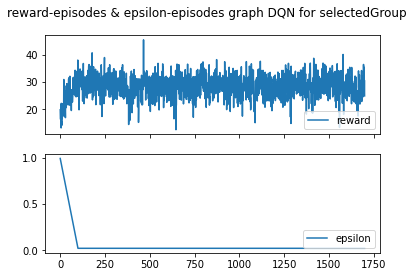

In [32]:
import matplotlib.pyplot as plt
reward_epsilon_values=[]
reward_epsilon_values.append(reward_per_episode)
reward_epsilon_values.append(epsilon_per_episode)
labels = ["reward", "epsilon"]
fig, axs = plt.subplots(2, sharex=True)
fig.suptitle('reward-episodes & epsilon-episodes graph DQN for selectedGroup')
for i,ax in enumerate(axs):
    axs[i].plot(reward_epsilon_values[i],label=labels[i])
    axs[i].legend(loc="lower right")
print(env.environment_group_identification)
torch.save(online_net, "online_net")
torch.save(target_net, "target_net")
online_net = torch.load("online_net")
target_net = torch.load("target_net")

In [33]:
TOTAL_EPISODES_VALIDATION=10
reward_per_episode_validation=[]
action_list_per_episode=[]
for episode in range(TOTAL_EPISODES_VALIDATION):
    obs=env.reset()
    done=False
    episode_reward=0
    action_list=[]
    while(done==False):
        action=online_net.act(obs)
        action_list.append(action)
        new_obs,rew,done, _ =env.step(action)
        episode_reward+=rew
        obs=new_obs        
    reward_per_episode_validation.append(episode_reward)
    action_list_per_episode.append(action_list)

(32, 34.9238114, 40, 10, 30)


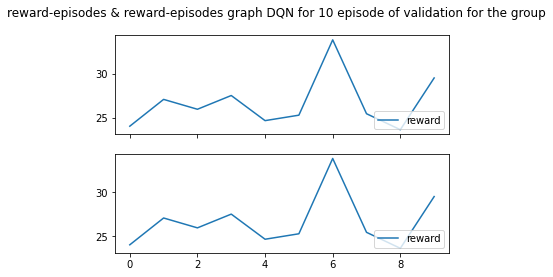

In [34]:
reward_epsilon_values=[]
reward_epsilon_values.append(reward_per_episode_validation)
reward_epsilon_values.append(reward_per_episode_validation)
labels = ["reward", "reward"]
fig, axs = plt.subplots(2, sharex=True)
fig.suptitle('reward-episodes & reward-episodes graph DQN for 10 episode of validation for the group')
for i,ax in enumerate(axs):
    axs[i].plot(reward_epsilon_values[i],label=labels[i])
    axs[i].legend(loc="lower right")
print(env.environment_group_identification)

In [35]:
action_dictionary=dict()

for action in range(env.action_space.n):
    value=env.actions[action]
    action_dictionary[action]=value
print(action_dictionary)

{0: (1, 1, 1), 1: (1, 1, 2), 2: (1, 1, 4), 3: (1, 1, 8), 4: (1, 1, 16), 5: (1, 1, 32), 6: (2, 1, 1), 7: (2, 1, 2), 8: (2, 1, 4), 9: (2, 1, 8), 10: (2, 1, 16), 11: (2, 1, 32), 12: (4, 1, 1), 13: (4, 1, 2), 14: (4, 1, 4), 15: (4, 1, 8), 16: (4, 1, 16), 17: (4, 1, 32), 18: (8, 1, 1), 19: (8, 1, 2), 20: (8, 1, 4), 21: (8, 1, 8), 22: (8, 1, 16), 23: (8, 1, 32), 24: (16, 1, 1), 25: (16, 1, 2), 26: (16, 1, 4), 27: (16, 1, 8), 28: (16, 1, 16), 29: (16, 1, 32), 30: (32, 1, 1), 31: (32, 1, 2), 32: (32, 1, 4), 33: (32, 1, 8), 34: (32, 1, 16), 35: (32, 1, 32)}


In [36]:
def print_list_action(lst):
    return_list=[]
    for i in lst:
        return_list.append(action_dictionary[i])
    return return_list
for i in range(len(action_list_per_episode)):
    print("Validation episode ",i, " actions taken")
    print(print_list_action(action_list_per_episode[i]))
    
    

Validation episode  0  actions taken
[(32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (32, 1, 2), (3

# previous emplementations

In [154]:

from fileData import environmentGroup
import random
import matplotlib.pyplot as plt

THRUPUT_PENALTY = -0.3 # hyperparameter
MAX_TIMESTEPS = 100

# QLearning agent
import random
from copy import deepcopy

import numpy as np


def list_to_tuple(l):
    return tuple(item for item in l)


def q_learning_fun(old_value, new_value, alpha, gamma, reward):
    return alpha * (reward + (gamma * new_value) - old_value)


# We can use 1 QLearning Agent per env group
class QLearningAgent:

    def __init__(self, env, group_key, gamma=.6, epsilon=1, alpha=.1, epi_min=0.01):
        self.env = env
        self.gamma = gamma
        self.epsilon = epsilon
        self.alpha = alpha
        self.epi_min = epi_min
        self.action_space = env.action_space
        self.observation_space = env.observation_space
        self.q_table = np.zeros([self.action_space.n, self.action_space.n])
        self.epsilon_list = [1]
        self.group_key = group_key
        self.board_dict ={}
        self.total_reward = 0
        self.reward_list = []

    def create(self):
        cell_count = 0
        for obs_tuple in self.env.states:
            self.board_dict[tuple(obs_tuple)] = cell_count
            cell_count+=1

    def step(self, observation):
        if random.uniform(0, 1) < self.epsilon_list[-1]:
            return np.random.choice(self.action_space.n)
        else:
            old_pos = tuple(self.env.current_observation)
            return np.argmax(self.q_table[self.board_dict[old_pos]])

    def q_learning_execution(self, episodes=20, decay=.99, alpha=.1, gamma=.99):
        self.env.reset()
        done = False
        reward_list = []
        for i in range(1, episodes):
            obs = self.env.reset()  # every epoch we reset the env
            done = False
            action = 0
            episode_reward = 0
            action_list = []
            reward_list2 = []
            self.epsilon_list.append(1 * decay ** i)
            while done is not True:  # loop until agent is done
                old_agent_position = self.env.current_observation
                action = self.step(obs)  # pick action this uses epsilon
                action_list.append(action)

                next_obs, reward, done, info = self.env.step(action)  # pass the action to env and get the next state

                reward_list2.append(reward)

                new_value = self.q_table[self.board_dict[tuple(self.env.current_observation)], action]

                old_value = self.q_table[self.board_dict[tuple(old_agent_position)], action]

                self.q_table[self.board_dict[tuple(old_agent_position)], action] += q_learning_fun(
                    old_value,
                    new_value,
                    alpha, gamma,
                    reward)
                episode_reward += reward
                obs = next_obs
                if done == True:
                    reward_list.append(sum(reward_list2))
            self.total_reward = np.sum(reward_list)
        print('Group Key: ', self.group_key, ' total reward: ',self.total_reward)
        self.reward_list = reward_list
        return reward_list

    def plot(self):
        plt.plot(self.reward_list)
        plt.show()



# 38 tuples total
class GroupedQLearningAgent:
    # inputs: an environment, group_num
    def __init__(self, env_list, key_list):
        self.agents = []
        for idx, env in enumerate(env_list):
            q_agent = QLearningAgent(env, key_list[idx])
            q_agent.create()
            self.agents.append(q_agent)

    def train_all(self):
        plt.title("All Q Learning Agent Reward")
        total_reward_list = []
        for idx, agent in enumerate(self.agents):
           agent.q_learning_execution()
           total_reward_list.append(agent.total_reward)

        plt.scatter([i for i in range(len(total_reward_list))], total_reward_list)
        plt.show()
        return total_reward_list




Group Key:  0  total reward:  340.8359042862343
Group Key:  1  total reward:  916.9345342599728
Group Key:  2  total reward:  1900.0
Group Key:  3  total reward:  336.47252745042283
Group Key:  4  total reward:  703.9870326451678
Group Key:  5  total reward:  962.8774000644205
Group Key:  6  total reward:  1163.4861949550752
Group Key:  7  total reward:  287.55025222923376
Group Key:  8  total reward:  258.88097358271455
Group Key:  9  total reward:  696.8950670126068
Group Key:  10  total reward:  757.5630600596849
Group Key:  11  total reward:  638.9694892482844
Group Key:  12  total reward:  757.6002843646716
Group Key:  13  total reward:  1900.0
Group Key:  14  total reward:  336.51578292948614
Group Key:  15  total reward:  1201.471605721532
Group Key:  16  total reward:  1900.0
Group Key:  17  total reward:  475.684057244658
Group Key:  18  total reward:  811.1757932572793
Group Key:  19  total reward:  228.73604283080417
Group Key:  20  total reward:  542.6235134878841
Group Key

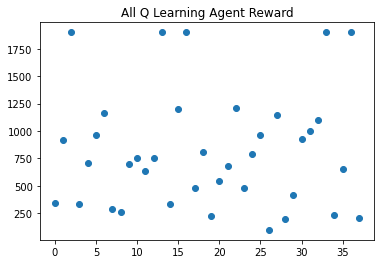

<BarContainer object of 38 artists>

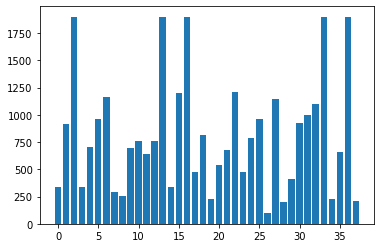

In [155]:

# local_cc_pp_p_group=environmentGroup(fileData_chameleon.get_grouped_df(),(32, 34.9238114, 40, 10, 30))
# q_agent = QLearningAgent(env,key)
# q_agent.create()
# q_agent.q_learning_execution()

env_list = []
key_list = []
counter = 0
for key in filedata_grouped_df.groups.keys():
    local_cc_pp_p_group=environmentGroup(fileData_chameleon.get_grouped_df(),key)
    env_list.append(NetEnvironment(local_cc_pp_p_group))
    key_list.append(counter)
    counter+=1

group_agents = GroupedQLearningAgent(env_list, key_list)
total_reward_list = group_agents.train_all()
plt.bar(key_list, total_reward_list)